In [2]:
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Define the Base and Engine
Base = declarative_base()
engine = create_engine('sqlite:///housing_trends.db')

C:\Users\laptop inn\AppData\Local\Temp\ipykernel_12824\3931452391.py:2: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [4]:
# Create classes for each year (2018-2022)

class Table2018(Base):
    __tablename__ = '2018_table'
    __table_args__ = {'extend_existing': True}
    Zip_code = Column(Integer, primary_key=True)
    Median_Contract_Rent = Column(Integer)
    Median_Monthly_Cost = Column(Integer)
    Total_Median_Monthly_Cost = Column(Integer)
    Median_Monthly_Cost_With_Mortgage = Column(Integer)
    Median_Monthly_Cost_Without_Mortgage = Column(Integer)
    Total_Housing_Units = Column(Integer)
    Housing_Units_Owned = Column(Integer)
    Housing_Units_Rented = Column(Integer)

class Table2019(Base):
    __tablename__ = '2019_table'
    __table_args__ = {'extend_existing': True}
    Zip_code = Column(Integer, primary_key=True)
    Median_Contract_Rent = Column(Integer)
    Median_Monthly_Cost = Column(Integer)
    Total_Median_Monthly_Cost = Column(Integer)
    Median_Monthly_Cost_With_Mortgage = Column(Integer)
    Median_Monthly_Cost_Without_Mortgage = Column(Integer)
    Total_Housing_Units = Column(Integer)
    Housing_Units_Owned = Column(Integer)
    Housing_Units_Rented = Column(Integer)

class Table2020(Base):
    __tablename__ = '2020_table'
    __table_args__ = {'extend_existing': True}
    Zip_code = Column(Integer, primary_key=True)
    Median_Contract_Rent = Column(Integer)
    Median_Monthly_Cost = Column(Integer)
    Total_Median_Monthly_Cost = Column(Integer)
    Median_Monthly_Cost_With_Mortgage = Column(Integer)
    Median_Monthly_Cost_Without_Mortgage = Column(Integer)
    Total_Housing_Units = Column(Integer)
    Housing_Units_Owned = Column(Integer)
    Housing_Units_Rented = Column(Integer)

class Table2021(Base):
    __tablename__ = '2021_table'
    __table_args__ = {'extend_existing': True}
    Zip_code = Column(Integer, primary_key=True)
    Median_Contract_Rent = Column(Integer)
    Median_Monthly_Cost = Column(Integer)
    Total_Median_Monthly_Cost = Column(Integer)
    Median_Monthly_Cost_With_Mortgage = Column(Integer)
    Median_Monthly_Cost_Without_Mortgage = Column(Integer)
    Total_Housing_Units = Column(Integer)
    Housing_Units_Owned = Column(Integer)
    Housing_Units_Rented = Column(Integer)

class Table2022(Base):
    __tablename__ = '2022_table'
    __table_args__ = {'extend_existing': True}
    Zip_code = Column(Integer, primary_key=True)
    Median_Contract_Rent = Column(Integer)
    Median_Monthly_Cost = Column(Integer)
    Total_Median_Monthly_Cost = Column(Integer)
    Median_Monthly_Cost_With_Mortgage = Column(Integer)
    Median_Monthly_Cost_Without_Mortgage = Column(Integer)
    Total_Housing_Units = Column(Integer)
    Housing_Units_Owned = Column(Integer)
    Housing_Units_Rented = Column(Integer)

In [6]:
# Create All Tables
Base.metadata.create_all(engine)

# Create Session
Session = sessionmaker(bind=engine)
session = Session()

In [7]:
# Define a function to read CSV and populate table
def read_and_populate_table(csv_path, table_class):
    
    df = pd.read_csv(csv_path)

    rent_column = next((col for col in df.columns if "Median Contract Rent" in col), None)
    if not rent_column:
        print(f"'Median Contract Rent' column not found in {csv_path}.")
        return


    # Read the CSV into a DataFrame
    # df = pd.read_csv(csv_path)

    # Populate the table
    session = Session()
    try:
        for index, row in df.iterrows():
            record = table_class(
                Zip_code=row['Zip Code'],
                Median_Contract_Rent=row.get(rent_column),
                Median_Monthly_Cost=row.get('Median Monthly Cost'),
                Total_Median_Monthly_Cost=row.get('Total Median Monthly Cost'),
                Median_Monthly_Cost_With_Mortgage=row.get('Median Monthly Cost With Mortgage'),
                Median_Monthly_Cost_Without_Mortgage=row.get('Median Monthly Cost Without Mortgage'),
                Total_Housing_Units=row.get('Total Housing Units'),
                Housing_Units_Owned=row.get('Housing Units Owned'),
                Housing_Units_Rented=row.get('Housing Units Rented')
            )
            session.add(record)
        session.commit()
        print(f"Data successfully populated into the {table_class.__tablename__}.")
    except Exception as e:
        session.rollback()
        print("An error occurred:", str(e))
    finally:
        session.close()

In [13]:
# Populate each table with corresponding CSV
read_and_populate_table('/Users/santiagocardenas/Documents/GitHub/Project-3-Data-Visualization/Tables With Nan/2018_tableN.csv', Table2018)
read_and_populate_table('/Users/santiagocardenas/Documents/GitHub/Project-3-Data-Visualization/Tables With Nan/2019_tableN.csv', Table2019)
read_and_populate_table('/Users/santiagocardenas/Documents/GitHub/Project-3-Data-Visualization/Tables With Nan/2020_tableN.csv', Table2020)
read_and_populate_table('/Users/santiagocardenas/Documents/GitHub/Project-3-Data-Visualization/Tables With Nan/2021_tableN.csv', Table2021)
read_and_populate_table('/Users/santiagocardenas/Documents/GitHub/Project-3-Data-Visualization/Tables With Nan/2022_tableN.csv', Table2022)

An error occurred: (sqlite3.IntegrityError) UNIQUE constraint failed: 2018_table.Zip_code
[SQL: INSERT INTO "2018_table" ("Zip_code", "Median_Contract_Rent", "Median_Monthly_Cost", "Total_Median_Monthly_Cost", "Median_Monthly_Cost_With_Mortgage", "Median_Monthly_Cost_Without_Mortgage", "Total_Housing_Units", "Housing_Units_Owned", "Housing_Units_Rented") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: [(76501.0, 523.0, 117400.0, 754.0, 1093.0, 481.0, 6236.0, 3836.0, 2400.0), (76502.0, 930.0, 159300.0, 1122.0, 1404.0, 556.0, 14826.0, 9975.0, 4851.0), (76504.0, 680.0, 93100.0, 689.0, 1076.0, 410.0, 8929.0, 3566.0, 5363.0), (76511.0, 393.0, 93100.0, 537.0, 1178.0, 337.0, 736.0, 559.0, 177.0), (76513.0, 668.0, 167400.0, 1023.0, 1483.0, 547.0, 13268.0, 8901.0, 4367.0), (76518.0, 663.0, 85900.0, 406.0, 1219.0, 318.0, 543.0, 465.0, 78.0), (76519.0, nan, 201200.0, 604.0, nan, 384.0, 115.0, 106.0, 9.0), (76520.0, 476.0, 91400.0, 596.0, 1029.0, 472.0, 2944.0, 1963.0, 981.0)  ... displaying 10 o

In [16]:
Table2018

__main__.Table2018

In [14]:
# Create DataFrames from each table using a function 

def create_dataframe(table_name):
    query = f'SELECT * FROM "{table_name}"'
    df = pd.read_sql(query, engine)
    return df

df_2018 = create_dataframe('2018_table')
df_2019 = create_dataframe('2019_table')
df_2020 = create_dataframe('2020_table')
df_2021 = create_dataframe('2021_table')
df_2022 = create_dataframe('2022_table')

In [20]:
df_2018.head()

,Zip_code,Median_Contract_Rent,Median_Monthly_Cost,Total_Median_Monthly_Cost,Median_Monthly_Cost_With_Mortgage,Median_Monthly_Cost_Without_Mortgage,Total_Housing_Units,Housing_Units_Owned,Housing_Units_Rented
0,76501,523.0,117400.0,754.0,1093.0,481.0,6236,3836,2400
1,76502,930.0,159300.0,1122.0,1404.0,556.0,14826,9975,4851
2,76504,680.0,93100.0,689.0,1076.0,410.0,8929,3566,5363
3,76511,393.0,93100.0,537.0,1178.0,337.0,736,559,177
4,76513,668.0,167400.0,1023.0,1483.0,547.0,13268,8901,4367


In [21]:
df_2019.head()

,Zip_code,Median_Contract_Rent,Median_Monthly_Cost,Total_Median_Monthly_Cost,Median_Monthly_Cost_With_Mortgage,Median_Monthly_Cost_Without_Mortgage,Total_Housing_Units,Housing_Units_Owned,Housing_Units_Rented
0,76501,534.0,121000.0,783.0,1134.0,474.0,6293,3888,2405
1,76502,972.0,163600.0,1143.0,1430.0,556.0,15369,10396,4973
2,76504,707.0,96100.0,771.0,1113.0,425.0,9107,3574,5533
3,76511,505.0,91500.0,520.0,1110.0,367.0,641,494,147
4,76513,744.0,173000.0,1067.0,1526.0,539.0,13669,9180,4489


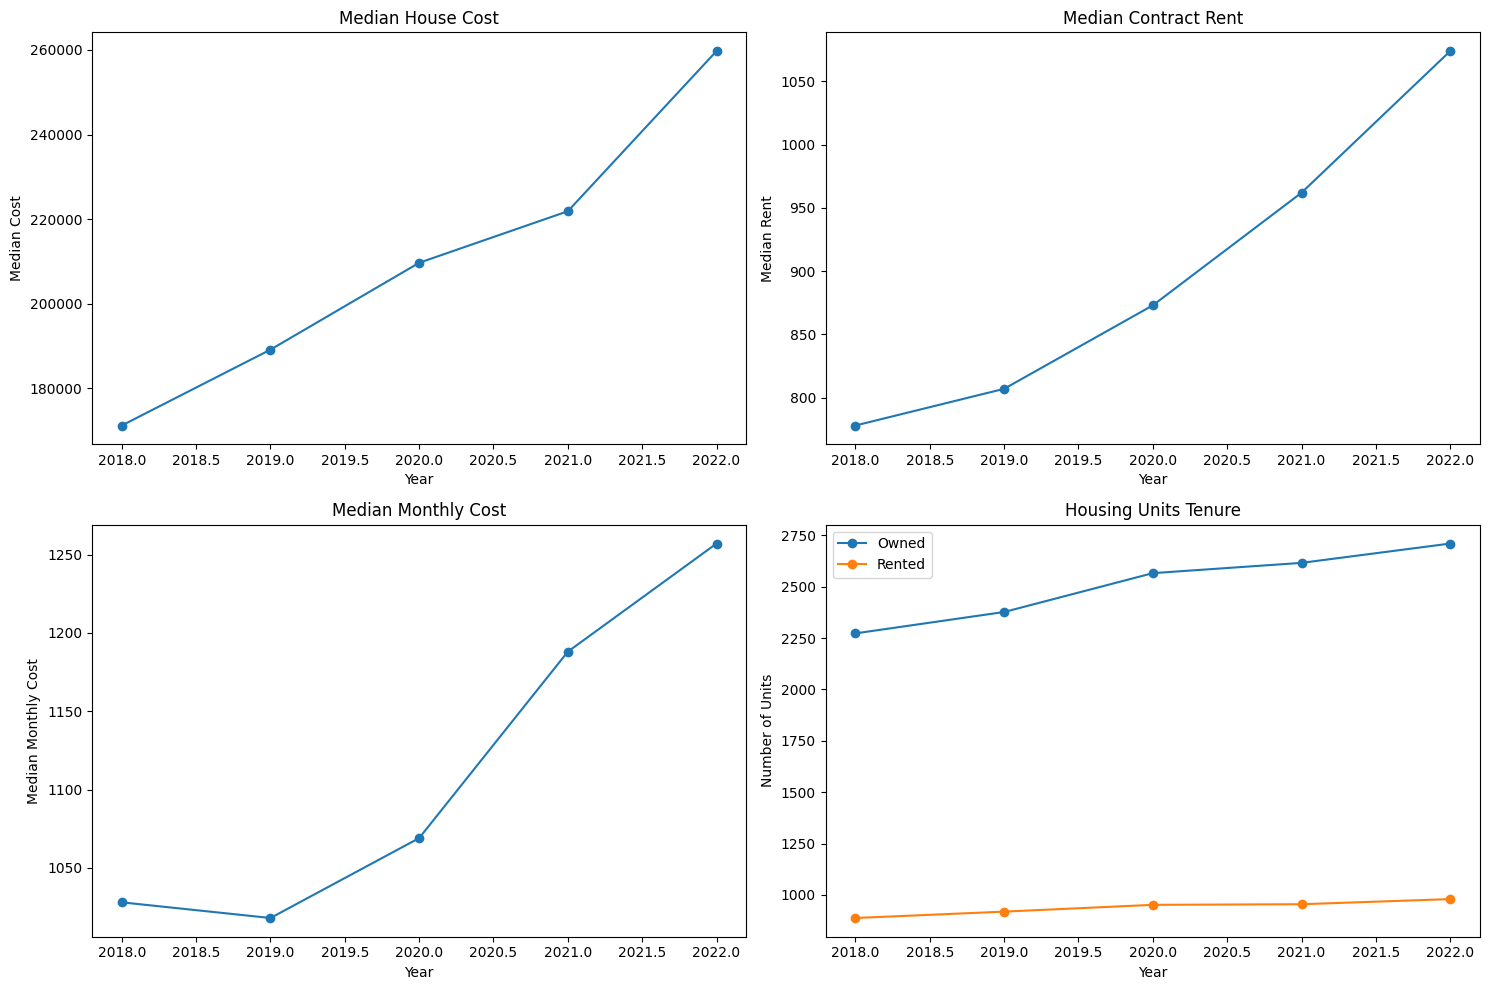

In [26]:
import matplotlib.pyplot as plt

# Create a list of years
years = [2018, 2019, 2020, 2021, 2022]

# Create a function to calculate median for each year
def calculate_median(df, column):
    return df[column].median()

# Create lists to store median values for each category
median_house_cost = []
median_rent = []
median_monthly_cost = []
housing_units_owned = []
housing_units_rented = []

# Calculate median values for each year
for year in years:
    df = globals()[f'df_{year}']
    median_house_cost.append(calculate_median(df, 'Median_Monthly_Cost'))
    median_rent.append(calculate_median(df, 'Median_Contract_Rent'))
    median_monthly_cost.append(calculate_median(df, 'Total_Median_Monthly_Cost'))
    housing_units_owned.append(calculate_median(df, 'Housing_Units_Owned'))
    housing_units_rented.append(calculate_median(df, 'Housing_Units_Rented'))

# Create the line charts
plt.figure(figsize=(15, 10))

# Median House Cost
plt.subplot(2, 2, 1)
plt.plot(years, median_house_cost, marker='o')
plt.title('Median House Cost')
plt.xlabel('Year')
plt.ylabel('Median Cost')

# Median Rent
plt.subplot(2, 2, 2)
plt.plot(years, median_rent, marker='o')
plt.title('Median Contract Rent')
plt.xlabel('Year')
plt.ylabel('Median Rent')

# Median Monthly Cost
plt.subplot(2, 2, 3)
plt.plot(years, median_monthly_cost, marker='o')
plt.title('Median Monthly Cost')
plt.xlabel('Year')
plt.ylabel('Median Monthly Cost')

# Tenure (Housing Units Owned and Rented)
plt.subplot(2, 2, 4)
plt.plot(years, housing_units_owned, marker='o', label='Owned')
plt.plot(years, housing_units_rented, marker='o', label='Rented')
plt.title('Housing Units Tenure')
plt.xlabel('Year')
plt.ylabel('Number of Units')
plt.legend()

plt.tight_layout()
plt.show()